In [1]:
from datetime import date, datetime, time, timedelta
import pysrt
from textblob import TextBlob
import matplotlib 
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from decimal import *
import csv
import pandas as pd
import numpy as np

In [4]:
file=open('/people/berhe/Bureau/TLP_thesis/Scenes/Episode_scenes_01.seg','r')
text=file.readlines()
line=text[1]
print (line)
spl=line.split()
print (spl)

9730 74640 2

['9730', '74640', '2']


In [3]:
for line in text:
    print line

0 6445

6445 106809

106809 212527 1

212527 292127 1

292127 389609 0 3

389609 522490 0 3

522490 668490 0

668490 770727 2 3

770727 907972 2 3

907972 1.12688e+06 0 3

1.12688e+06 1.172e+06 2

1.172e+06 1.27553e+06 2 3

1.27553e+06 1.47484e+06 3

1.47484e+06 1.52084e+06 1

1.52084e+06 1.72096e+06 2

1.72096e+06 1.91261e+06 0

1.91261e+06 2.02528e+06 1

2.02528e+06 2.05756e+06 2

2.05756e+06 2.13596e+06 0

2.13596e+06 2.24564e+06 0

2.24564e+06 2.29792e+06 0

2.29792e+06 2.40116e+06 1

2.40116e+06 2.5308e+06 1

2.5308e+06 2.64248e+06 3

2.64248e+06 2.805e+06 3

2.805e+06 2.85644e+06 3

2.85644e+06 2.8946e+06 3

2.8946e+06 3.14312e+06 3

3.14312e+06 3.17416e+06 3

3.17416e+06 3.24932e+06 3

3.24932e+06 3.31565e+06



In [4]:
file_sub='/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'
subs=pysrt.open(file_sub,encoding='iso-8859-1')
#scence_scv=pd.read_csv('/people/berhe/Bureau/Project/TLP_thesis/Scenes/groundtruth.seg',header=None,sep=" ")

In [5]:
def create_intervals(start, end, delta):
    current=start
    while current<=end:
        current=(datetime.combine(date.today(),current)+delta).time()
        yield current

In [6]:
def subtitle_extraction(file='/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'):
    subs=pysrt.open(file,encoding='iso-8859-1')
    n=len(subs)
    intervals=[]
    start=time(0,0,0)
    end=subs[-1].end.to_time()
    delta=timedelta(minutes=delta)
    for results in create_intervals(start, end, delta):
        intervals.append(results)
    index=0
    m=len(intervals)
    for i in range(m):
        text=""
        for j in range(index,n):
            if subs[j].end.to_time()<intervals[i]:
                text+=subs[j].text_without_tags + " "
            else:
                break
        blob=TextBlob(text)
        pol=blob.sentiment.polarity
    
    

In [6]:
def scene_extraction(file=open('/people/berhe/Bureau/TLP_thesis/Scenes/Episode_scenes_01.seg','r')):
    text=file.readlines()
    start_scene=[]
    end_scene=[]
    story_id=[]
    for text_line in text:
        if not text_line in ['\n', '\r\n']:
            splitte_lines=text_line.split()
            for i in range(len(splitte_lines)-2):
                try:
                    start_scene.append(splitte_lines[0])
                    end_scene.append(splitte_lines[1])
                    story_id.append(splitte_lines[i+2])
                except IndexError:
                    story_id.append('NA')
        else:
            continue
    return start_scene,end_scene,story_id

In [7]:
x,y,z=scene_extraction()

In [8]:
csv_obj=pd.DataFrame(columns=('start_time','end_time','story_id'))

In [9]:
csv_obj.start_time=x
csv_obj.end_time=y
csv_obj.story_id=z

In [10]:
csv_obj

,start_time,end_time,story_id
0,9730,74640,2
1,74640,193366,2
2,193366,268564,2
3,268564,434119,2
4,536119,566719,2
5,566719,580200,2
6,580200,727600,0
7,727600,910441,0
8,727600,910441,2
9,910441,1.0936e+06,0


In [12]:
df=csv_obj

In [17]:
#df.story_id=[float(i) for i in csv_obj.start_time]
df.start_time=[float(i)/1000 for i in df.start_time]
df.end_time=[float(i)/1000 for i in csv_obj.end_time]

In [18]:
df.story_id=csv_obj.story_id

In [19]:
df

,start_time,end_time,story_id
0,9.730,74.640,2
1,74.640,193.366,2
2,193.366,268.564,2
3,268.564,434.119,2
4,536.119,566.719,2
5,566.719,580.200,2
6,580.200,727.600,0
7,727.600,910.441,0
8,727.600,910.441,2
9,910.441,1093.600,0


In [20]:
df.sort_values(['start_time'],ascending=True)

,start_time,end_time,story_id
0,9.730,74.640,2
1,74.640,193.366,2
2,193.366,268.564,2
3,268.564,434.119,2
4,536.119,566.719,2
5,566.719,580.200,2
6,580.200,727.600,0
8,727.600,910.441,2
7,727.600,910.441,0
9,910.441,1093.600,0


In [21]:
df.to_csv("S01E01_manual.csv",header=True)

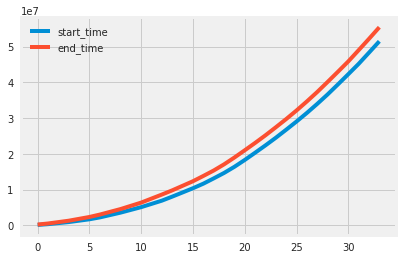

In [51]:
df1=df.cumsum()
plt.figure();df1.plot();

story_id
0    [[AxesSubplot(0.08,0.125;0.378261x0.755), Axes...
1    [[AxesSubplot(0.08,0.125;0.378261x0.755), Axes...
2    [[AxesSubplot(0.08,0.125;0.378261x0.755), Axes...
3    [[AxesSubplot(0.08,0.125;0.378261x0.755), Axes...
dtype: object

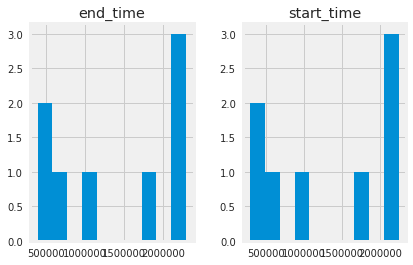

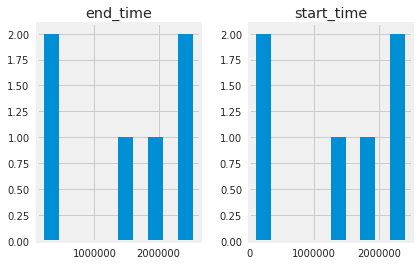

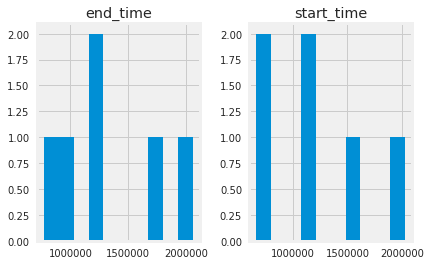

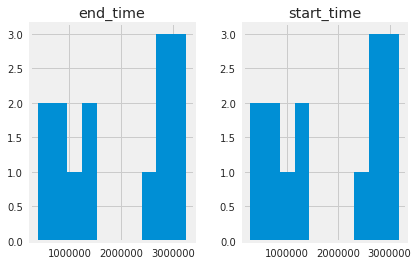

In [52]:
df.groupby('story_id').hist()

In [53]:
def extracting_story_time(start_scene,end_scene,story_id):
    start_story=[]
    end_story=[]
    id_story=[]
    tmp=0
    st_pt=0
    for i in range(len(end_scene)-1):
        if (story_id[i]==story_id[i+1] ):
            tmp=end_scene[i]
        else:
            start_story.append(start_scene[st_pt])
            st_pt=i+1
            if(end_scene[i]!='NA'):
                tmp=end_scene[i]
            end_story.append(tmp)
            id_story.append(story_id[i])
            tmp=0
    df_story_time=pd.DataFrame(columns=('st_st_t','st_ed_t','st_id'))
    df_story_time.st_st_t=start_story
    df_story_time.st_ed_t=end_story
    df_story_time.st_id=id_story
    return df
    

In [54]:
df_extracted=extracting_story_time(df.start_time,df.end_time,df.story_id)

In [55]:
df_story_time=pd.DataFrame(columns=('st_st_t','st_ed_t','st_id'))

In [56]:
df_story_time=df_story_time.sort_values(['st_id'],ascending=True)

In [57]:
df_story_time=df_story_time.reset_index(drop=True)

In [58]:
df_extracted

,start_time,end_time,story_id
0,106809.0,212527.0,1
1,212527.0,292127.0,1
2,292127.0,389609.0,0
3,292127.0,389609.0,3
4,389609.0,522490.0,0
5,389609.0,522490.0,3
6,522490.0,668490.0,0
7,668490.0,770727.0,2
8,668490.0,770727.0,3
9,770727.0,907972.0,2


In [80]:
def to_min_sec(st_ms,end_ms):
    Ssec=st_ms/1000
    Esec=end_ms/1000
    sm,ss=divmod(Ssec,60)
    em,es=divmod(Esec,60)
    ss=round(ss,2)
    #sm=round(sm,2)
    #sm=round(sm,2)
    es=round(es,2)
    return sm,ss,em,es

In [68]:
df_extracted.columns

Index([u'start_time', u'end_time', u'story_id'], dtype='object')

In [69]:
m,s,em,es=to_min_sec(df_extracted.start_time[5],df_extracted.end_time[5])

In [70]:
m,s,em,es

(6.0, 29.61, 8.0, 42.49)

In [71]:
part_stor1 = subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es})

In [72]:
df_extracted.start_time[5],df_extracted.end_time[5]

(389609.0, 522490.0)

In [73]:
print(part_stor1.text)

- Little brother.
- Beloved siblings.
ls Bran going to die?
Apparently not.
- What do you mean?
- The maester says the boy may live.
It's no mercy, letting a child
linger in such pain.
Only the gods know for certain.
All the rest of us n do is pray.
The charms of the North
seem entirely lost on you.
I still n't believe you're going.
It's ridiculous, even for you.
Where's your sense of wonder?
The greatest structure ever built,
the intrepid men of the Night's Watch,
the wintry abode of the white walkers.
Tell me you're not thinking
of taking the black.
And go celibate?
The whores would go begging
from Dorne to Oasierly Rock
No, I just want to stand
on top of the Wall
and piss off the edge of the world.
The children don't need to hear your ï¬lth.
Come.
Even if the boy lives,
he'll be a cripple, a grotesque.
Give me a good, clean death any day.
Speaking for the grotesques,
I'd have to disagree.
Death is so ï¬nal, whereas life...
ah, life is full of possibilities.
I hope the boy does wak

In [96]:
m,s,em,es=to_min_sec(df_extracted.start_time[31],df_extracted.end_time[31])
print(m,s,em,es)
part_stor2 = subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es})
print(part_stor2.text)

(48.0, 14.6, 52.0, 23.12)
You let that little girl disarm you?
Ned, see to it that your daughter
is disciplined.
- I'll do the same with my son.
- Gladly, Your Grace.
(Cersei) And what of the direwolf?
What of the beast
that savaged your son?
I'd forgot the damned wolf.
We found no trace of the direwolf.
Your Grace.
No? So be it.
We have another wolf.
As you will.
Get her a dog.
She'll be happier for it.
He doesn't mean Lady, does he?
No, no, not Lady
Lady didn't bite anyonel
- She's goodl
- Lady wasn't there
- You leave her alonel
- Stop them. Don't let them do it.
Please, please, it wasn't Lady
Is this your command?
Your Grace?
- Where is the beast?
- Chained up outside, Your Grace.
Ser Ilyn, do me the honour.
No.
Jory...
hke the girls to their rooms.
- (Sansa sobbing)
- If it must be done,
then I'll do it myself.
Is this some trick?
The wolf is of the North.
She deserves better than a butcher.
The butcher's boy -
you rode him down?
He ran.
Not very fast.
(Whines)
(Whines)
(Whimpers)

In [47]:
part_stor12 = subs.slice(starts_after={'minutes': 28, 'seconds':41}, ends_before={'minutes': 31, 'seconds': 53})

In [48]:
print(part_stor12.text)

now help me keep the damn thing.
We were meant to rule together.
If your sister had lived,
we'd have been bound by blood.
Well, it's not too late.
I have a son,
you have a daughter.
We'll join our houses.
(Woman moaning)
(Sighs)
(Cup falls)
It is true what they say
about the northern girls.
(Giggles)
Did you hear the king's in Winterfell?
I did hear something about that.
And the queen and her twin brother.
They say that he is the most handsome man
in the Seven Kingdoms.
And the other brother?
- The queen has two brothers?
- There's the pretty one...
and there's the clever one.

I hear they II him the Imp.
I hear he hates that nickname.
Oh? I hear he's more than earned it.
I hear he's a drunken little Iecher,
prone to all manner of perversions.
Clever girl.
We've been expecting you, Lord Tyrion.
Have you?
- Already?
- Ohl
- The gods gave me one blessing.
- (Laughs)
(Door opens)
- Don't get up.
- My lord.
Should I explain to you the meaning of
a closed door in a whorehouse, brother?
You 

In [49]:
subs[0].text

u'(Gate rumbling, chains rattling)'

In [50]:
print subs[0].text
print subs[0].start
print subs[0].end

(Gate rumbling, chains rattling)
00:00:10,599
00:00:13,113


In [51]:
print("start\t end\t story id")
for i in range(10):
    if z[i]=='NA':
        print(x[i]+"\t "+y[i]+"\t "+"story not assigned")
    else:
        print(x[i]+"\t "+y[i]+"\t "+z[i])

start	 end	 story id
0	 9730	 story not assigned
9730	 74640	 2
74640	 193366	 2
193366	 268564	 2
268564	 434119	 2
434119	 536119	 story not assigned
536119	 566719	 2
566719	 580200	 2
580200	 727600	 0
727600	 910441	 0


In [77]:
import os
import re
def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub("([\(\[]).*?([\)\]])", "", string)
    #string = re.sub(r")", r"", string)
    #string = re.sub(r"\?", " \? ", string)
    #string = re.sub(r"\s{2,}", " ", string)
    return string.strip()#.lower()

In [78]:
def sceneTexts(start,end,story_id,file_name):
    #fname=input("input file name to save texts")
    #text_file=open(fname,'w')
    #index = np.array([0, 1, 2, 3, 4])
    #Episode1_stories=pd.DataFrame(columns=(['story_text','story_id']),index=index)
    subs=pysrt.open(file_name,encoding='iso-8859-1')
    part_st=""
    scene_texts=[]
    scene_lbls=[]
    for i in range(len(start)):
        m,s,em,es=to_min_sec(start[i],end[i])
        part_st=subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es}).text.encode('utf-8')
        part_st=clean_str(part_st)
        scene_texts.append(part_st)
        scene_lbls.append(story_id[i])
        #if (story_id[i]==story_id[i+1]):
         #  part_st=part_st + subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es}).text.encode('utf-8')
        #else:
         #   part_st=part_st + subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es}).text.encode('utf-8')
          #  text_file.write(part_st)
           # text_file.write("\n------------------------------------------------------------------------\n")
            #part_st=""
    return scene_texts,scene_lbls

In [79]:
f='/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'
sc_tex,sc_lbl=sceneTexts(df_extracted.start_time,df_extracted.end_time,df_extracted.story_id,f)

In [80]:
len(sc_tex),len(sc_lbl)

(35, 35)

In [81]:
print(sc_tex[4])

Your dead men seem to have moved mp  They were here  See where they went   What is it? It 's


In [84]:
tb=TextBlob(sc_tex[4])

In [85]:
for s in tb.sentences:
    print s

Your dead men seem to have moved mp  They were here  See where they went   What is it?
It 's


In [87]:
tb.raw_sentences

['Your dead men seem to have moved mp  They were here  See where they went   What is it?',
 "It 's"]

In [86]:
corr=TextBlob(CL_STR).correct()
print(corr)

Your dead men seem to have moved up  They were here  See where they went   That is it? It  's


In [88]:
def average_sentiment(y):
    avg=float(sum(y))/len(y)
    return avg

In [104]:
def nameExtraction(textblob):
    charachters=[]
    for tag in textblob.tags:
        #print (tag)
        if 'NNP' in tag[1:]:
            charachters.append(tag[0])
    return charachters

In [101]:
tex=""
for i in range(len(sc_tex)):
    tex=tex+sc_tex[i]

In [102]:
texblb=TextBlob(tex)

In [109]:
textbl=texblb.correct()

In [110]:
namesch=nameExtraction(texblb)

In [111]:
namesch

['Easy',
 'How',
 'Wall',
 'Get',
 'Get',
 'Oh',
 'Thank',
 'Keep',
 'Bran',
 'Go',
 'Bran',
 'Relax',
 'Quick',
 'Branl',
 'Faster',
 'Lord',
 'Starkl',
 'My',
 'A',
 'Night',
 'Watch',
 'Get',
 'Cat',
 'Law',
 'Tell',
 'Bran',
 'Ned',
 'Ten',
 'Good',
 'White',
 'White',
 'Tell',
 'Forgive',
 'Lord',
 'Robert',
 'House',
 'Baratheon',
 'King',
 'First',
 'Men',
 'Father',
 'Lord',
 'Seven',
 'Kingdoms',
 'Eddard',
 'House',
 'Stark',
 'Lord',
 'Winterfell',
 'Warden',
 'North',
 'Jon',
 'Tough',
 'Wall',
 'Nol',
 'Put',
 'Please',
 'Fatherl',
 'Bran',
 'Lord',
 'Stark',
 'Stark',
 'Stark',
 'Get',
 'SnowAs',
 'Casterly',
 'Rock',
 'Father',
 "'We",
 'Lannisters',
 'Lannisters',
 'Jon',
 'Arryn',
 'Whatever',
 'Jon',
 'Arryn',
 'Robert',
 'Hand',
 'King',
 'Hand',
 'King',
 'That',
 'Their',
 'Tell',
 'King',
 'Landing',
 'Jon',
 'Arryn',
 'A',
 'Winterfell',
 'Ned',
 'Lord',
 'Tyrion',
 'How',
 'Think',
 'Go',
 'Tommy',
 'Brandonl',
 'Do',
 'Run',
 'Tell',
 'Where',
 'Arya',
 'Sansa'

In [109]:
def stories_sentiment(file):
    story_file=open(file)
    story_line=story_file.readline()
    sentements=[]
    average_sent=[]
    stories=['']*6
    storyCharcters=['']*6
    pos=0
    for line in story_file:
        if not ("-----------------------" in line):
            stories[pos]=stories[pos]+" "+line
        else:
            txtblb=TextBlob(stories[pos].decode('utf-8'))
            for sent in txtblb.sentences:
                sentements.append(sent.sentiment.polarity)
            average_sent.append(average_sentiment(sentements))
            storyCharcters[pos]=nameExtraction(txtblb)
            pos=pos+1
    return average_sent, storyCharcters,stories
            

In [190]:
f='/home/berhe/Desktop/LIMSI/TLP_thesis/codes/story_file_all'

In [193]:
avg,characters,doc=stories_sentiment(f)

(u'What', u'WP')
(u'is', u'VBZ')
(u'it', u'PRP')
(u'It', u'PRP')
(u"'s", u'VBZ')
(u'Cracking', u'NNP')
(u'creaking', u'VBG')
(u'Distant', u'NNP')
(u'scream', u'NN')
(u'Horses', u'NNP')
(u'neighing', u'VBG')
(u'Galloping', u'VBG')
(u'hooves', u'NNS')
(u'Snarling', u'VBG')
(u'Chittering', u'VBG')
(u'Coughing', u'VBG')
(u'Panting', u'VBG')
(u'Laboured', u'NNP')
(u'breathing', u'NN')
(u'Snarling', u'VBG')
(u'GBSPS', u'NNP')
(u'Crackling', u'VBG')
(u'Chittering', u'VBG')
(u'Galloping', u'VBG')
(u'hooves', u'NNS')
(u'Stamps', u'NNP')
(u'Go', u'NNP')
(u'on', u'IN')
(u'Father', u'NNP')
(u"'s", u'POS')
(u'watching', u'NN')
(u'And', u'CC')
(u'your', u'PRP$')
(u'mother', u'NN')
(u'Fine', u'JJ')
(u'work', u'NN')
(u'as', u'IN')
(u'always', u'RB')
(u'Well', u'RB')
(u'done', u'VBN')
(u'Thank', u'NNP')
(u'you', u'PRP')
(u'I', u'PRP')
(u'love', u'VBP')
(u'the', u'DT')
(u'detail', u'NN')
(u'that', u'IN')
(u'you', u'PRP')
(u"'ve", u'VBP')
(u'managed', u'VBN')
(u'to', u'TO')
(u'get', u'VB')
(u'in', u'IN')

(u'Ned', u'NNP')
(u'Ten', u'CD')
(u'is', u'VBZ')
(u'too', u'RB')
(u'young', u'JJ')
(u'to', u'TO')
(u'see', u'VB')
(u'such', u'JJ')
(u'things', u'NNS')
(u'He', u'PRP')
(u'wo', u'MD')
(u"n't", u'RB')
(u'be', u'VB')
(u'a', u'DT')
(u'boy', u'NN')
(u'forever', u'NN')
(u'And', u'CC')
(u'winter', u'NN')
(u'is', u'VBZ')
(u'coming', u'VBG')
(u'Good', u'JJ')
(u'lad', u'NN')
(u'go', u'VB')
(u'run', u'VBN')
(u'back', u'RB')
(u'and', u'CC')
(u'get', u'VB')
(u'the', u'DT')
(u'rest', u'NN')
(u'White', u'NNP')
(u'walkers', u'NNS')
(u'I', u'PRP')
(u'saw', u'VBD')
(u'the', u'DT')
(u'white', u'JJ')
(u'walkers', u'NNS')
(u'White', u'NNP')
(u'walkers', u'NNS')
(u'The', u'DT')
(u'white', u'JJ')
(u'walkers', u'NNS')
(u'I', u'PRP')
(u'saw', u'VBD')
(u'them', u'PRP')
(u'Exhales', u'NNPS')
(u'I', u'PRP')
(u'know', u'VBP')
(u'I', u'PRP')
(u'broke', u'VBD')
(u'my', u'PRP$')
(u'oath', u'NN')
(u'And', u'CC')
(u'I', u'PRP')
(u'know', u'VBP')
(u'I', u'PRP')
(u"'m", u'VBP')
(u'a', u'DT')
(u'deserter', u'NN')
(u'I', u'

(u'Echoing', u'VBG')
(u'creature', u'NN')
(u'cries', u'NNS')
(u'What', u'WP')
(u'is', u'VBZ')
(u'it', u'PRP')
(u'It', u'PRP')
(u"'s", u'VBZ')
(u'Cracking', u'NNP')
(u'creaking', u'VBG')
(u'Distant', u'NNP')
(u'scream', u'NN')
(u'Horses', u'NNP')
(u'neighing', u'VBG')
(u'Galloping', u'VBG')
(u'hooves', u'NNS')
(u'Snarling', u'VBG')
(u'Chittering', u'VBG')
(u'Coughing', u'VBG')
(u'Panting', u'VBG')
(u'Laboured', u'NNP')
(u'breathing', u'NN')
(u'Snarling', u'VBG')
(u'GBSPS', u'NNP')
(u'Crackling', u'VBG')
(u'Chittering', u'VBG')
(u'Galloping', u'VBG')
(u'hooves', u'NNS')
(u'Ned', u'NNP')
(u'Ten', u'CD')
(u'is', u'VBZ')
(u'too', u'RB')
(u'young', u'JJ')
(u'to', u'TO')
(u'see', u'VB')
(u'such', u'JJ')
(u'things', u'NNS')
(u'He', u'PRP')
(u'wo', u'MD')
(u"n't", u'RB')
(u'be', u'VB')
(u'a', u'DT')
(u'boy', u'NN')
(u'forever', u'NN')
(u'And', u'CC')
(u'winter', u'NN')
(u'is', u'VBZ')
(u'coming', u'VBG')
(u'Good', u'JJ')
(u'lad', u'NN')
(u'go', u'VB')
(u'run', u'VBN')
(u'back', u'RB')
(u'and', 

IndexError: list index out of range

In [194]:
avg

[0.025529529993815712,
 0.02709305150631681,
 0.027403058706938013,
 0.031516108160845]

In [195]:
sum(avg)/len(avg)

0.027885437091978882

In [196]:
print map(lambda x: x.encode('ascii'), characters[1])

['Horse', 'Man', 'Horse', 'Wall', 'Get', 'Sighs', 'Get', 'Shrill', 'Neighs', 'Gull', 'Man', 'Daenerysl', 'Daenerys', 'Illyrio', 'Illyrio', 'Sighs', 'Please', 'Father', 'Laughter', 'Fill', 'Boys', 'Rodrik', 'Come', 'Come', 'Robert', 'Uncle', 'Benjen', 'Laughs', 'Rode', 'Lady', 'Stark', 'Wall', 'Wall', 'Sighs', 'T', 'Night', 'Watch', 'Wall', "Tyr'ion", 'Lannister', 'Ned', 'Starks', 'Did', 'Sorry', 'Lord', 'Eddard', 'Stark', 'Lady', 'Stark', 'Laughter']


In [197]:
print map(lambda x: x.encode('utf-8'), characters[0])

['Cracking', 'Distant', 'Horses', 'Laboured', 'GBSPS', 'Stamps', 'Go', 'Father', 'Thank', 'Oh', 'Arrows', 'Arrow', 'Sighs', 'Keep', 'Bran', 'Bran', 'Men', 'Branl', 'Lord', 'Starkl', 'My', 'Night', 'Watch', 'Cat', 'Tell', 'Bran', 'Pup', 'Tough', 'Wall', 'Pup', 'Bran', 'Fatherl', 'Bran', 'Lord', 'Stark', 'Stark', 'Pup', 'Stark', 'Snow', 'Bells', 'Casterly', 'Rock', 'Father', 'Mimim', 'Woman', 'Sighs', 'Cup', 'Giggles', 'Did', 'Winterfell', 'Seven', 'Kingdoms', 'II', 'Imp', 'Iecher', 'Clever', 'Lord', 'Tyrion', 'Laughs', 'Door', 'Starks', '\xc3\xaf\xc2\xac\xc2\x81rst', 'Come', 'Giaalina', 'T', 'Did', 'Grace', 'Gulls', 'Dothraki', 'Illyrio', 'Athchomar', 'Khal', 'May', 'Viserys', 'House', 'Targaryen', 'King', 'First', 'Men', 'Daenerys', 'House', 'Targaryen', 'Dothraki', 'Dothraki', 'Khal', 'Drogo', 'Come', 'Did', 'Trust', 'Grace', 'Dothraki', 'Khal', 'Drogo', 'Drogo', 'Sodo', 'I.', 'Khal', 'Drogo', 'Joffrey']


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
 
#documents = ["This little kitty came to play when I was eating at a restaurant.",
            # "Merley has the best squooshy kitten belly.",
            # "Google Translate app is incredible.",
            # "If you open 100 tab in google you get a smiley face.",
             #"Best cat photo I've ever taken.",
             #"Climbing ninja cat.",
             #"Impressed with google map feedback.",
             #"Key promoter extension for Google Chrome."]
documents=sc_tex
 
 
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
 
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print
 

Top terms per cluster:
Cluster 0:  home  army  come  soon  like  drogo  queen  married  say  want  horses  leave  took  father  did
Cluster 1:  ndles  prick  raven  royal  told  brought  hear  king  good  right  dead  night  queen  ll  chamber
Cluster 2:  king  mother  hear  did  know  saw  night  lord  right  father  doing  ve  time  ll  walkers
Cluster 3:  lot  savages  expect  ripping  easy  goat  steals  pieces  boy  know  given  gives  girls  grave  giving


In [126]:
for i in range(len(sc_tex)):
    print("Prediction")
    Y = vectorizer.transform([sc_tex[i]])
    prediction = model.predict(Y)
    print(prediction),
    print[sc_lbl[i]]

Prediction
[2] ['NA']
Prediction
[2] ['2']
Prediction
[3] ['2']
Prediction
[2] ['2']
Prediction
[2] ['2']
Prediction
[2] ['NA']
Prediction
[2] ['2']
Prediction
[2] ['2']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[1] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['1']
Prediction
[0] ['1']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['1']
Prediction
[2] ['1']
Prediction
[2] ['0']
Prediction
[2] ['0']
Prediction
[2] ['NA']


In [57]:
print("Prediction")
Y = vectorizer.transform(["Lannisters don't act like fools now help me keep the damn thing."])
prediction = model.predict(Y)
print(prediction)
 
Y = vectorizer.transform(["What the hell do you know about being a bastard?"])
prediction = model.predict(Y)
print(prediction)

Prediction
[0]
[2]


In [127]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'white, walkers,  king, robert,  ned', 
                 1: 'bran, horses, khal,dothraki,drogon', 
                 2: 'bastard,father,wall', 
                 3: 'king, ned ,dothraki,murdered,jorah ' }
    

[[  848.8931    1342.1183     370.9918  ]
 [  771.8438   -1377.1361     385.40976 ]
 [   21.662958   -13.032408 -1095.6931  ]
 [-1642.3988      48.051216   339.31305 ]]


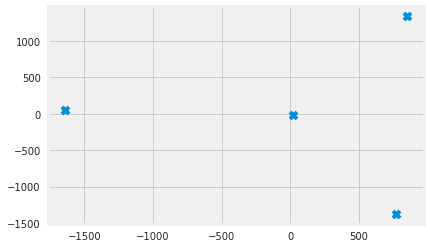

In [131]:
from sklearn.manifold import TSNE
centroids = model.cluster_centers_
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 10.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1
model1 = TSNE(n_components=3, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model1.fit_transform(centroids)
print (transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

In [133]:
labels = model.labels_
centroids = model.cluster_centers_

In [134]:
labels

array([2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [135]:
tfidf_matrix = vectorizer.fit_transform(documents)

In [136]:
tfidf_matrix.shape

(35, 667)

In [199]:
documents=sc_tex
 
 
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(documents)
 
true_k = 4
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model1.fit(X1)
 
print("Top terms per cluster:")
order_centroids = model1.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  moved  mp  went  men  dead  zhey  goat  grace  got  good
Cluster 1:  stark  direwolf  mother  ifthey  feed  snow  death  fatherl  freak  blade
Cluster 2:  horse  close  children  away  run  thing  did  wildlings  frighten  tracked
Cluster 3:  king  know  hear  mother  night  did  father  saw  come  right


In [206]:
for i in range(len(sc_tex)):
    print("true  Prediction")
    Y = vectorizer.transform([sc_tex[i]])
    prediction = model1.predict(Y)
    print sc_lbl[i],
    print ('\t'),
    print(prediction)

true  Prediction
NA 	[3]
true  Prediction
2 	[3]
true  Prediction
2 	[3]
true  Prediction
2 	[2]
true  Prediction
2 	[0]
true  Prediction
NA 	[3]
true  Prediction
2 	[3]
true  Prediction
2 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[1]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
1 	[3]
true  Prediction
1 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
1 	[3]
true  Prediction
1 	[3]
true  Prediction
0 	[3]
true  Prediction
0 	[3]
true  Prediction
NA 	[3]


Heirarchical Clustering ...

In [138]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

In [139]:
vectorizer = CountVectorizer(input='content')
dtm = vectorizer.fit_transform(sc_tex)
vocab = vectorizer.get_feature_names()

In [140]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [141]:
dtm=dtm.toarray()
vocab=np.array(vocab)

In [143]:
snow_idx = list(vocab).index('snow')
snow_idx

631

In [144]:
n, _ = dtm.shape
dist_eclud = np.zeros((n, n))

Ecludian Distance

In [146]:
for i in range(n):
    for j in range(n):
        x, y = dtm[i, :], dtm[j, :]
        dist_eclud[i, j] = np.sqrt(np.sum((x - y)**2))

In [147]:
dist_eclud = euclidean_distances(dtm)

In [148]:
np.round(dist_eclud, 1)

array([[0. , 0. , 5.9, ..., 9.4, 0. , 0. ],
       [0. , 0. , 5.9, ..., 9.4, 0. , 0. ],
       [5.9, 5.9, 0. , ..., 9.8, 5.9, 5.9],
       ...,
       [9.4, 9.4, 9.8, ..., 0. , 9.4, 9.4],
       [0. , 0. , 5.9, ..., 9.4, 0. , 0. ],
       [0. , 0. , 5.9, ..., 9.4, 0. , 0. ]])

Cosine Similarity 

In [149]:
cos_sim = 1 - cosine_similarity(dtm)

In [150]:
np.round(cos_sim, 2)

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 0.  , ..., 0.77, 1.  , 1.  ],
       ...,
       [1.  , 1.  , 0.77, ..., 0.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

In [151]:
cos_sim.shape

(35, 35)

In [171]:
import os
import matplotlib.pyplot as plt
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos=mds.fit_transform(cos_sim)

In [172]:
xs,ys=pos[:, 0],pos[:,1]

In [173]:
names=['story 1','story 2','story 3','story 4']

<function matplotlib.pyplot.show>

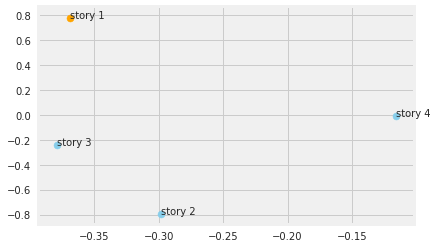

In [174]:
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "story 1" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)
    
plt.show

In [182]:
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos1=mds.fit_transform(cos_sim)

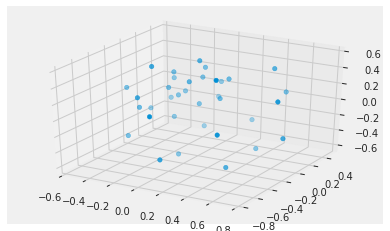

In [183]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos1[:, 0], pos1[:, 1], pos1[:, 2])

In [184]:
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

In [185]:
#plt.tight_layout() 
plt.show()

In [186]:
from scipy.cluster.hierarchy import ward, dendrogram

In [187]:
link_matr=ward(cos_sim)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 0.9251659610852844, 0.9251659610852844, 0.0],
  [0.0, 0.7032405008145726, 0.7032405008145726, 0.0],
  [0.0, 0.9898307784719358, 0.9898307784719358, 0.7032405008145726],
  [0.9251659610852844,
   1.2122241181459574,
   1.2122241181459574,
   0.9898307784719358],
  [0.0, 0.4770979796668414, 0.4770979796668414, 0.0],
  [0.0, 0.5993191176350307, 0.5993191176350307, 0.4770979796668414],
  [0.0, 0.6386380396910216, 0.6386380396910216, 0.0],
  [0.5993191176350307,
   0.7640527578869392,
   0.7640527578869392,
   0.6386380396910216],
  [0.0, 0.6793444815330664, 0.6793444815330664, 0.0],
  [0.0, 0.7057357223497971, 0.7057357223497971, 0.6793444815330664],
  [0.0, 0.7611455520705389, 0.7611455520705389, 0.7057357223497971],
  [0.

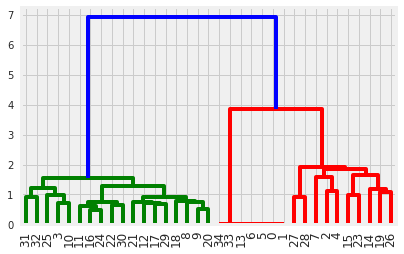

In [192]:
dendrogram(link_matr,leaf_rotation=90,leaf_font_size=12)

In [194]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

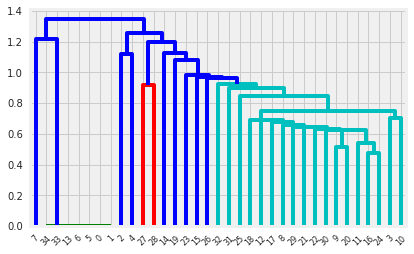

In [195]:
Z = hierarchy.linkage(cos_sim, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)